In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('../data/data.csv')
p18 = pd.read_csv('../data/sp2018.csv')
p19 = pd.read_csv('../data/sp2019.csv')
p20 = pd.read_csv('../data/sp2020.csv')

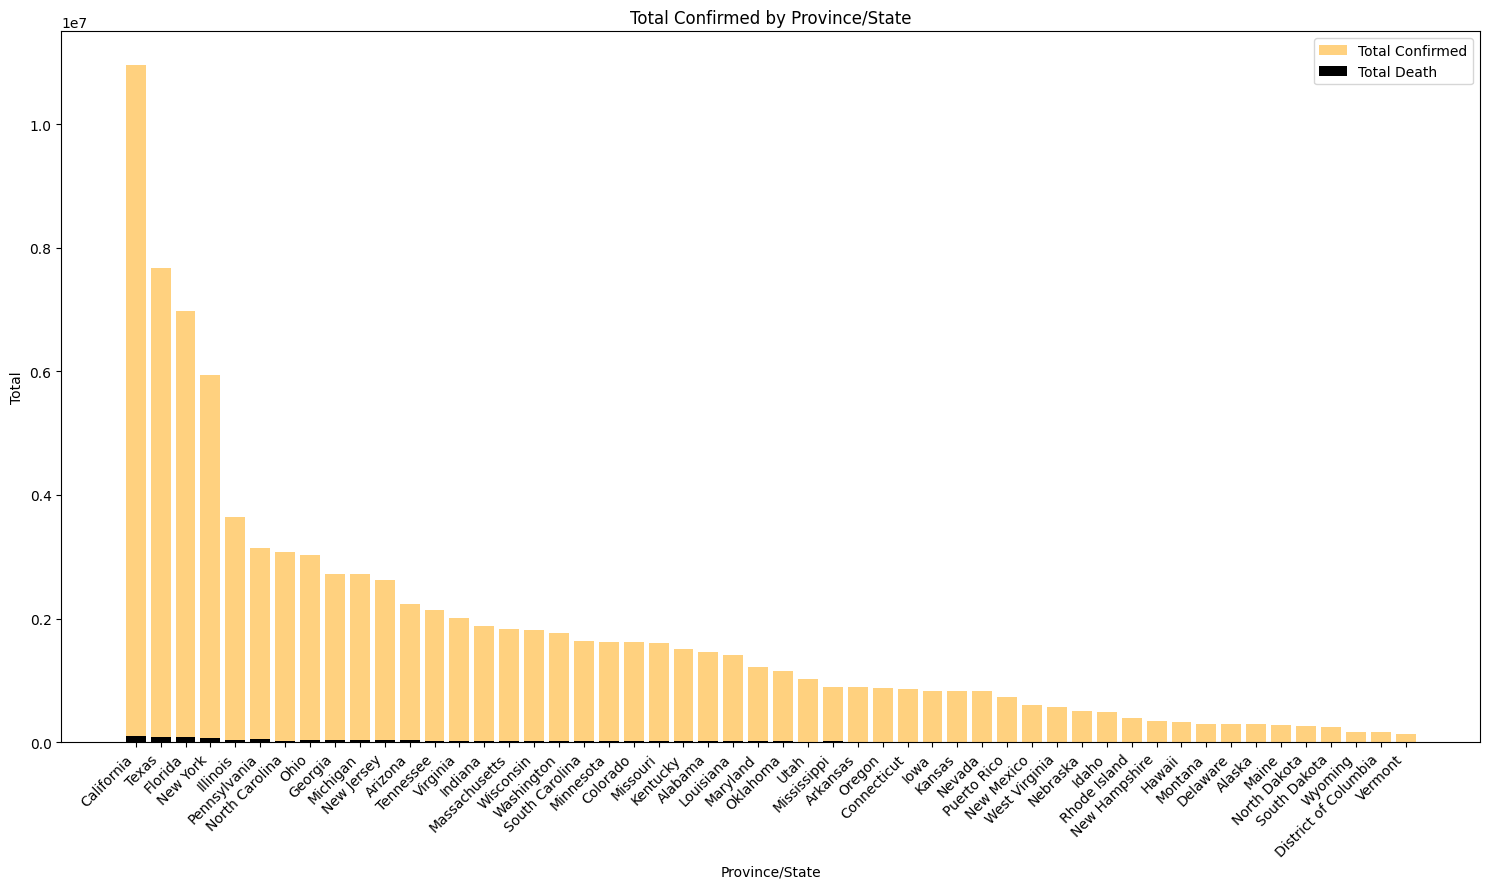

In [82]:
state_df = df.groupby('Province/State')[['Total Death', 'Total Confirmed']].sum().reset_index()
state_df = state_df.sort_values(by='Total Confirmed', ascending=False)

plt.figure(figsize=(15, 9))

plt.bar(state_df['Province/State'], state_df['Total Confirmed'], color='orange', label='Total Confirmed',alpha=0.5)
plt.bar(state_df['Province/State'], state_df['Total Death'], color='black', label='Total Death')

plt.xlabel('Province/State')
plt.ylabel('Total')
plt.title('Total Confirmed by Province/State')

plt.xticks(rotation=45, ha="right")

plt.legend()

plt.tight_layout()
plt.show()

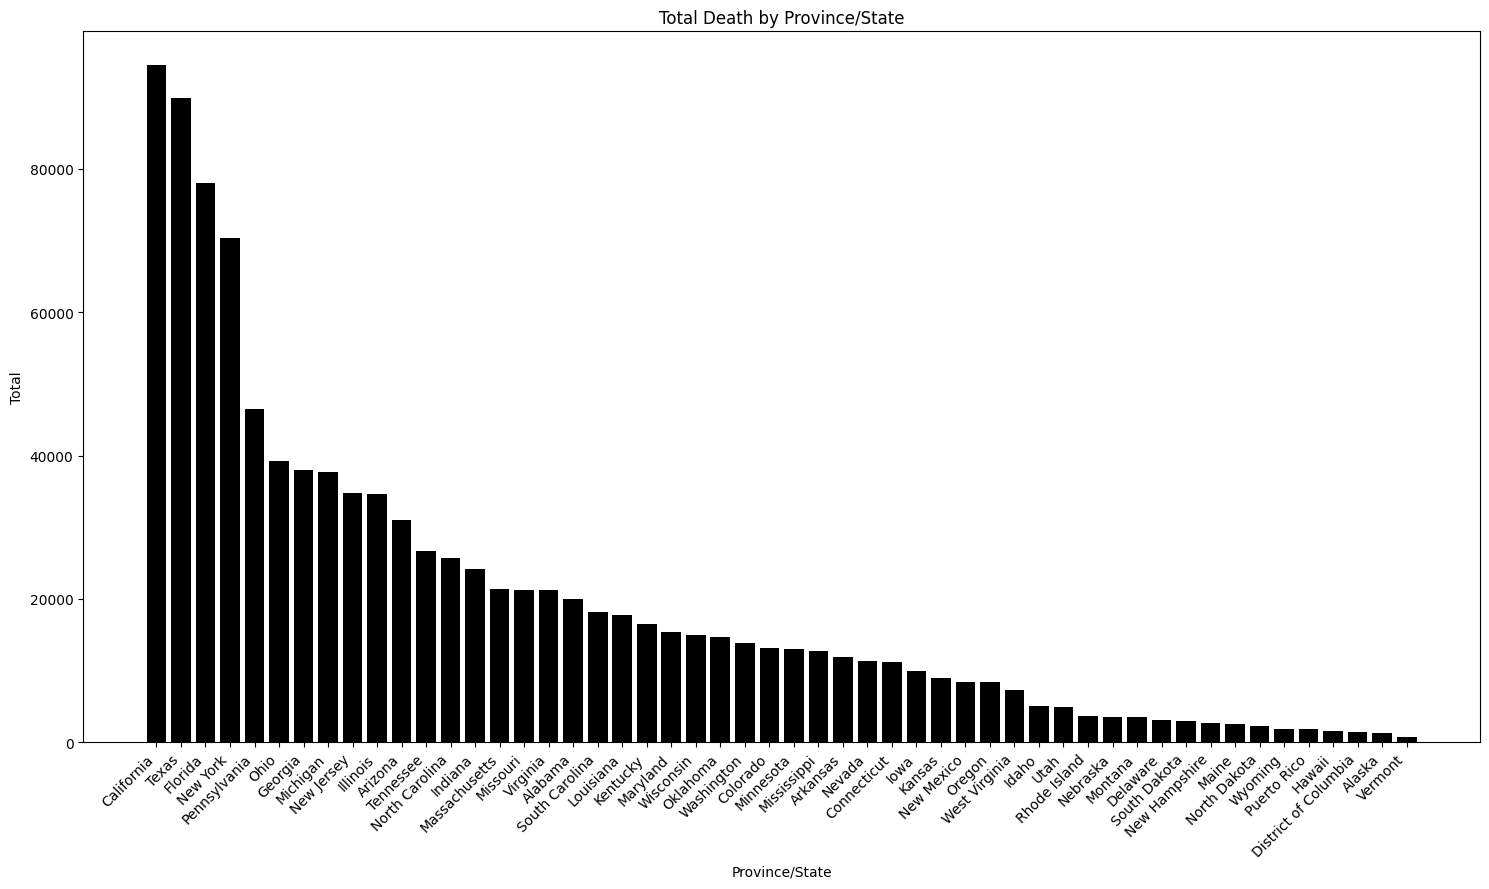

In [71]:
state_df = df.groupby('Province/State')[['Total Death', 'Total Confirmed']].sum().reset_index()
state_df = state_df.sort_values(by='Total Death', ascending=False)  # Sort by Total Confirmed in descending order

plt.figure(figsize=(15, 9))

plt.bar(state_df['Province/State'], state_df['Total Death'], color='black', label='Total Death')

plt.xlabel('Province/State')
plt.ylabel('Total')
plt.title('Total Death by Province/State')

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

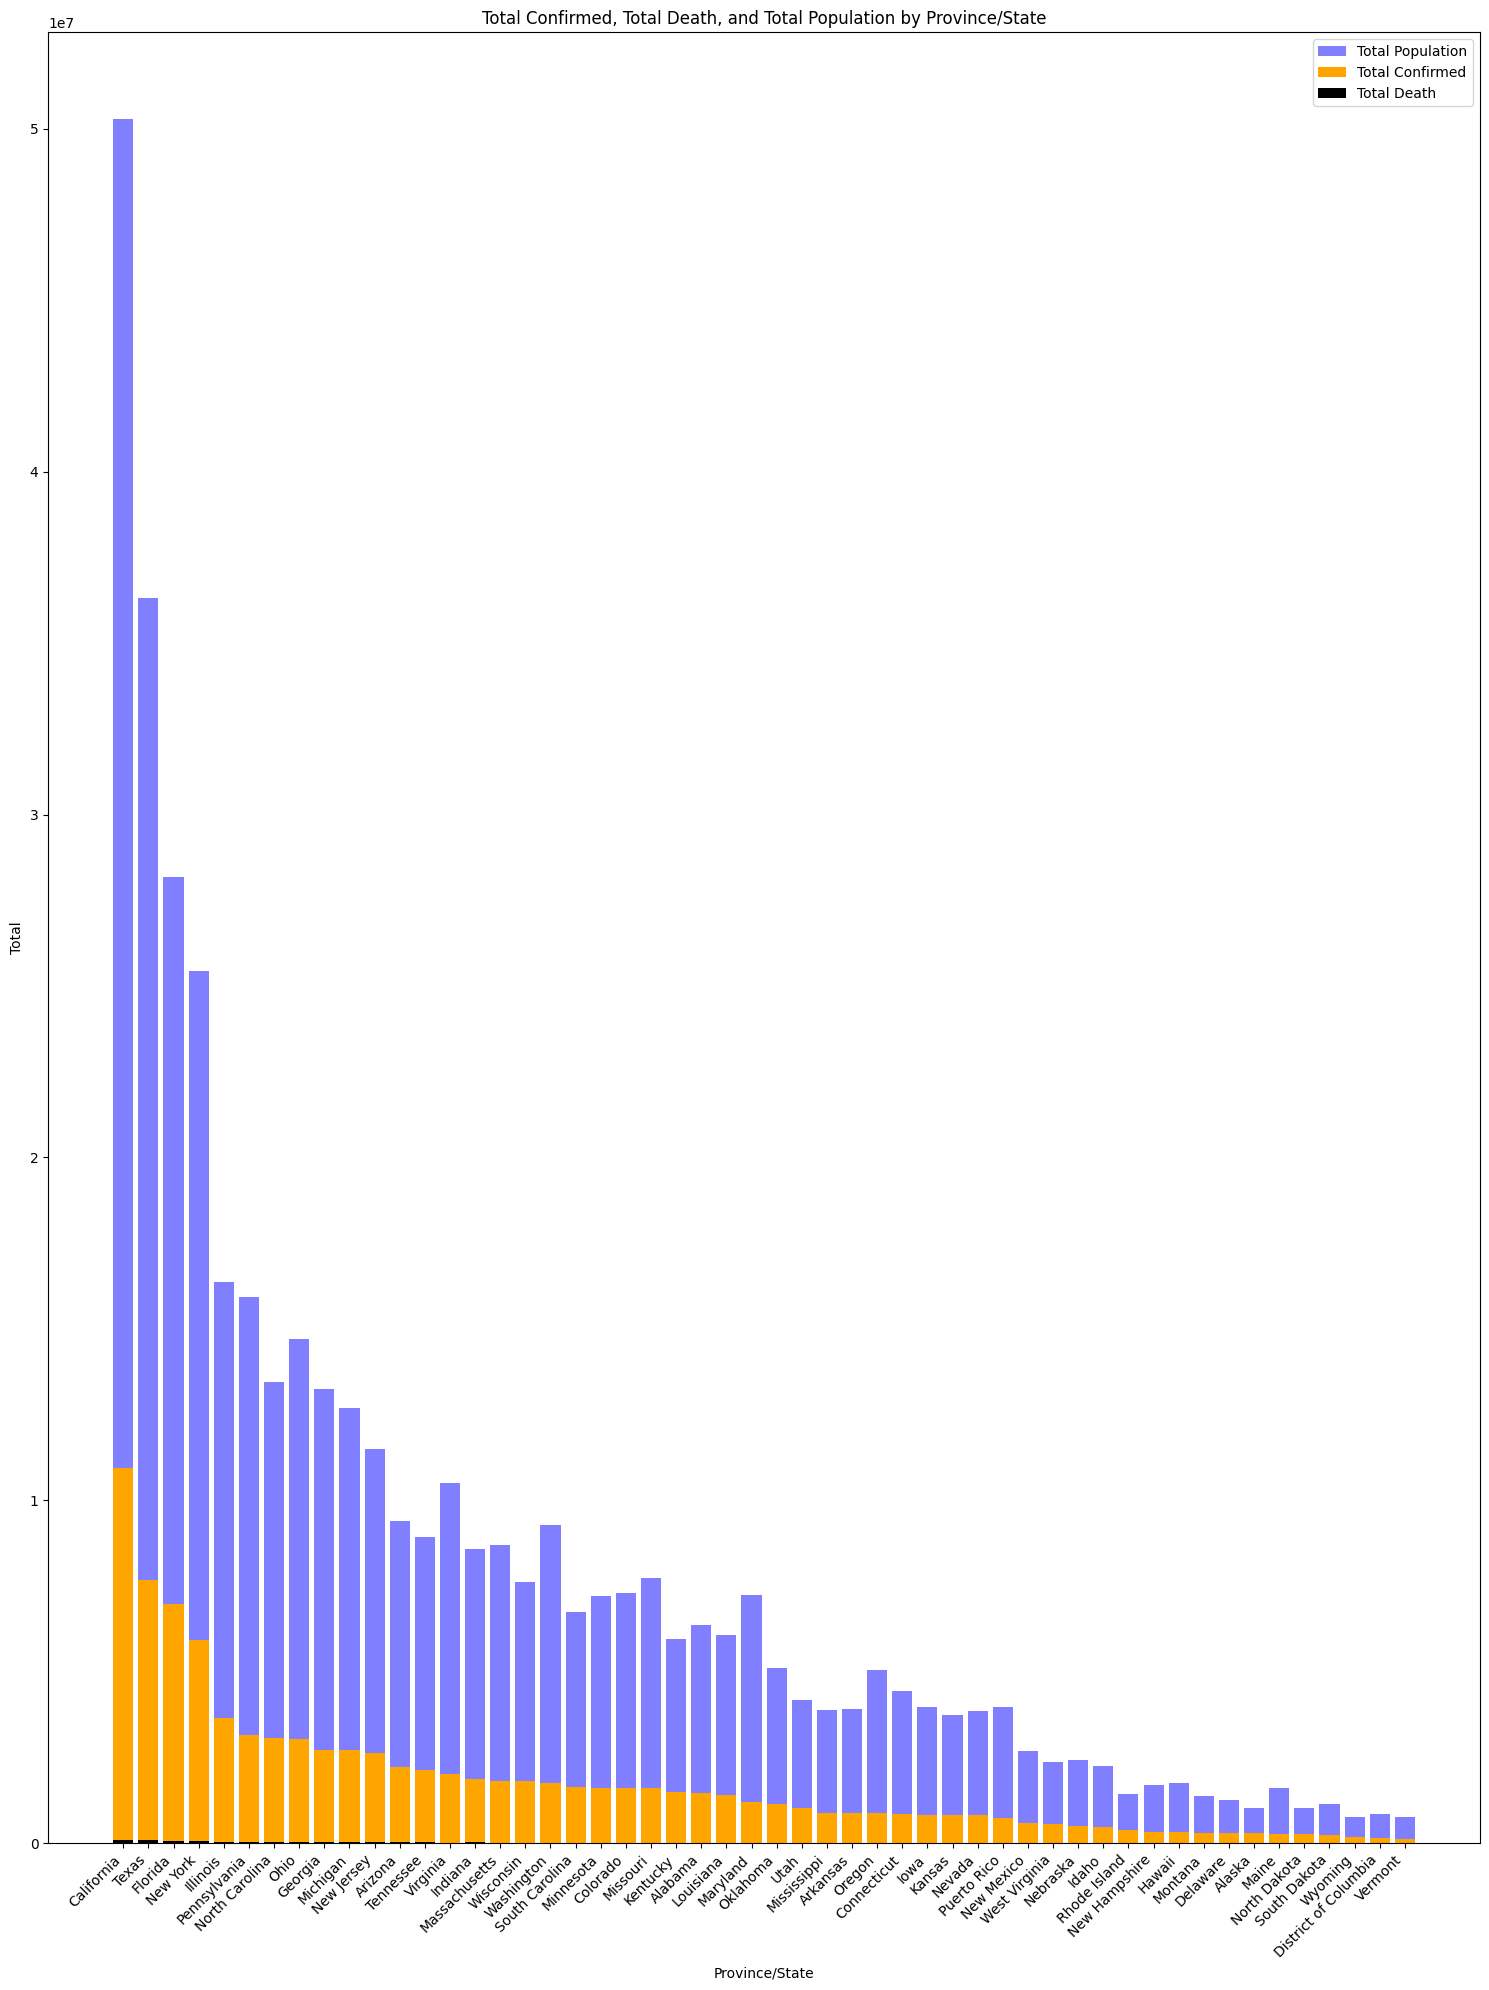

In [85]:
state_df = df.groupby('Province/State')[['Total Death', 'Total Confirmed']].sum().reset_index()
state_df = state_df.sort_values(by='Total Confirmed', ascending=False)

state_df = state_df.merge(p20[['State', '2020 Population']], left_on='Province/State', right_on='State', how='left')

state_df['Total Population'] = state_df['2020 Population'] + state_df['Total Confirmed']

plt.figure(figsize=(15, 20))

plt.bar(state_df['Province/State'], state_df['Total Population'], color='blue', label='Total Population', alpha=0.5)
plt.bar(state_df['Province/State'], state_df['Total Confirmed'], color='orange', label='Total Confirmed')
plt.bar(state_df['Province/State'], state_df['Total Death'], color='black', label='Total Death')


plt.xlabel('Province/State')
plt.ylabel('Total (Million)')
plt.title('Total Confirmed, Total Death, and Total Population by Province/State')

plt.xticks(rotation=45, ha="right")

plt.legend()

plt.tight_layout()
plt.show()